In [1]:
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp

import matplotlib as mpl

In [2]:
sim = h5py.File('/data/cielo/simulations/LG1_fixed/LG1.hdf5', 'r')
snap = sim['SnapNumber_128']
grou = snap['Groups']

In [3]:
for k in grou.keys():
    try:
        print(k, ':', grou[k].attrs['description'])
    except:
        print(k)

GroupCM : Center of mass of the Group
GroupLen : Total number of particles in the group
GroupLenType : Total number of particles in the group, split by particle type
GroupMassType : Total mass of particles in the group, split by particle type
GroupNsubs : Number of SubGroups in each Group
GroupNumber : FoF id of the Group this object belongs to. -1 if the object does not belong to any group
GroupSFR :  Sum of the individual star formation rates of all gas cells in this group
Group_M_Crit200 : Total Mass of this group enclosed in a sphere whose mean density is 200 times the critical density of the Universe, at the time the halo is considered
Group_M_Mean200 : Total Mass of this group enclosed in a sphere whose mean density is 200 times the mean density of the Universe, at the time the halo is considered
Group_M_TopHat200 : 
Group_R_Crit200 : Comoving Radius of a sphere centered at this Group whose mean density is 200 times the critical density of the Universe, at the time the halo is co

In [4]:
NumberOF = grou['GroupNsubs']
MassP = grou['GroupMassType']
MassV = grou['Group_M_Crit200']

MassP.shape

(6414, 6)

In [5]:
MassStar = MassP[:,4]
MassStar.shape

(6414,)

In [6]:
#pl.rc('text', usetex=True)
pl.rc('font', size = 20)
pl.rc('legend', fontsize = 20)

Text(0, 0.5, 'Frequency')

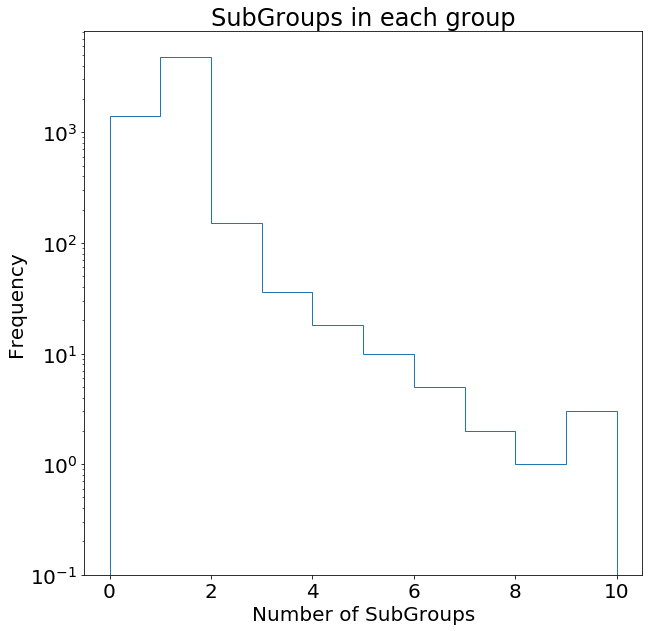

In [7]:
pl.figure(figsize=(10,10))

pl.hist(NumberOF, histtype='step', log=True, bins=10, range=(0,10))

pl.title('SubGroups in each group')

pl.xlabel('Number of SubGroups')
pl.ylabel('Frequency')

In [8]:
len(NumberOF)

6414

Text(0, 0.5, 'Frequency')

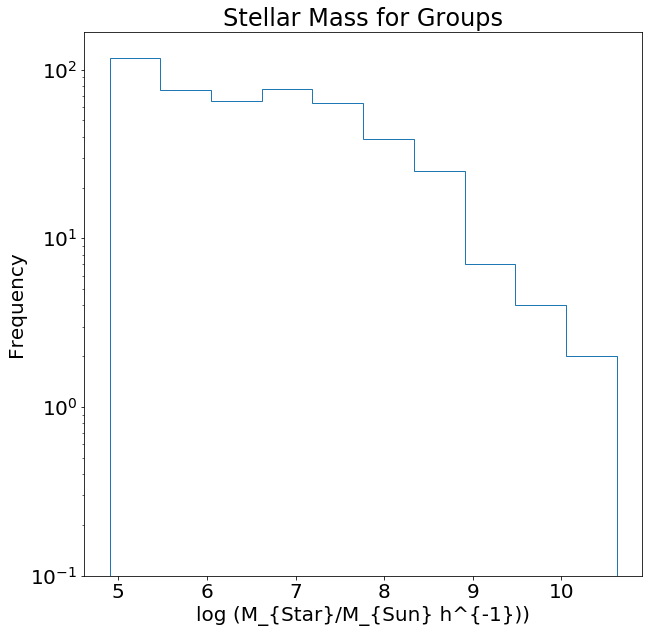

In [9]:
pl.figure(figsize=(10,10))

i = np.where(MassStar>0)

pl.title('Stellar Mass for Groups')

lMassStar = np.log10(MassStar[i]*1e10)

pl.hist(lMassStar, log=True, histtype='step')
pl.xlabel('log (M_{Star}/M_{Sun} h^{-1}))')
pl.ylabel('Frequency')

In [10]:
MassP.attrs.keys()

<KeysViewHDF5 ['cgs_conversion_factor', 'cgs_units', 'description', 'description_units', 'h_exp']>

In [11]:
MassP.attrs['description_units']

'$10^{10}  h^{-1} M_\\odot$'

In [12]:
MassV.attrs.keys()

<KeysViewHDF5 ['cgs_conversion_factor', 'cgs_units', 'description', 'description_units', 'h_exp']>

In [13]:
MassV.attrs['description_units']

'$10^{10}  h^{-1} M_\\odot$'

Text(0, 0.5, 'Frequency')

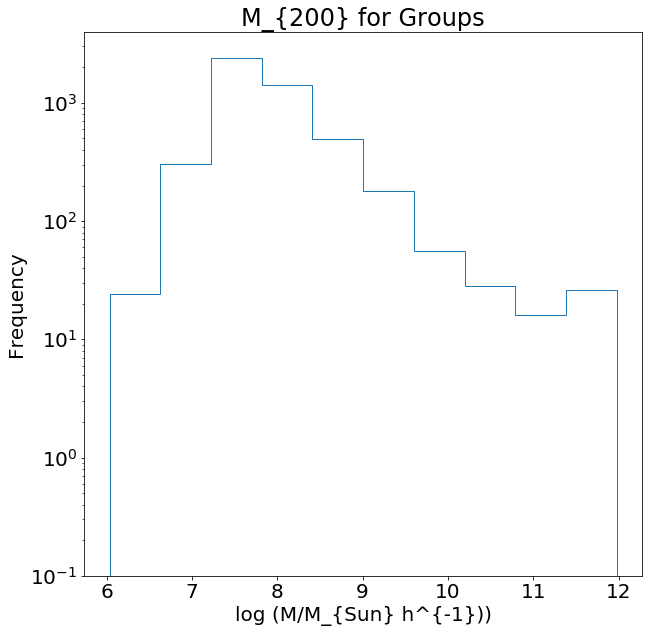

In [14]:
pl.figure(figsize=(10,10))

MassC = MassV[()]
i = np.where(MassC>0)

lMassV = np.log10(MassC[i]*1e10)

pl.title('M_{200} for Groups')

pl.hist(lMassV, log=True, histtype='step')
pl.xlabel('log (M/M_{Sun} h^{-1}))')
pl.ylabel('Frequency')

In [15]:
#Ok, subGroups Now.
subgrou = snap['SubGroups']
for k in subgrou.keys():
    try:
        print(k, ':', subgrou[k].attrs['description'])
    except:
        print(k)

Apertures
GroupNumber : FoF id of the Group this object belongs to. -1 if the object does not belong to any group
OpticalRadius : Optical radii computed as the radius that encompass 83% of stellar and star-forming gas mass belonging to the SubGroup
PartType0
PartType1
PartType4
PartType5
SnapNumber
SubFindNumber : SubFind id of the object this particle belongs to. -1 if the object does not belong to any SubGroup
SubGroupHalfMass : Half mass of the SubGroup
SubGroupLen : Number of particles contained in this SubGroup
SubGroupMostBoundID : ParticleID of the most bound particle
SubGroupNumber : SubGroup number this object belongs to. 0 for centrals. -1 if the object does not belongto any SubGroup
SubGroupPos : Position of the most bound particle
SubGroupSpin
SubGroupVel : Peculiar velocity of the center of mass of the SubGroup
SubGroupVelDisp
SubGroupVelMax


In [16]:
PartT4 = snap['PartType4']
PartT4.keys()

<KeysViewHDF5 ['Abundances', 'BindingEnergy', 'Circularity', 'Coordinates', 'GroupNumber', 'Masses', 'ParticleIDs', 'Potential', 'SpecificAngularMomentum', 'StellarFormationTime', 'SubFindNumber', 'SubGroupNumber', 'Velocities']>

In [17]:
PartT4['Masses'].attrs.keys()

<KeysViewHDF5 ['cgs_conversion_factor', 'cgs_units', 'description', 'description_units', 'h_exp']>

In [18]:
PartT4['Masses'].attrs['description_units']

'$10^{10}  h^{-1} M_\\odot$'

In [19]:
PartT4['Masses'][1]

9.185235e-06

In [20]:
SGHalfMass = subgrou['SubGroupHalfMass']
SGHalfMass.attrs['description_units']

'$10^{10}  h^{-1} M_\\odot$'

Text(0, 0.5, 'Frequency')

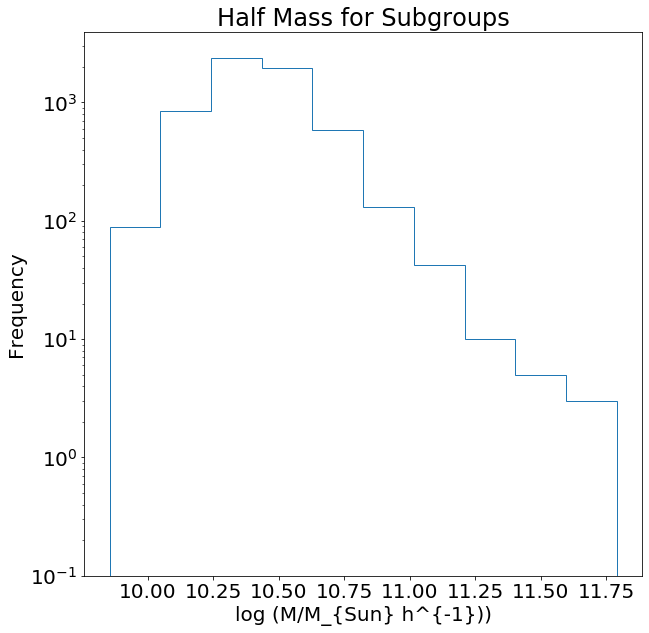

In [21]:
pl.figure(figsize=(10,10))

SGMassC = SGHalfMass[()]
i = np.where(SGMassC>0)

lSGMass = np.log10(SGMassC[i]*1e10)

pl.title('Half Mass for Subgroups')

pl.hist(lSGMass, log=True, histtype='step')
pl.xlabel('log (M/M_{Sun} h^{-1}))')
pl.ylabel('Frequency')

In [22]:
# and by adding particles masses

SGstMass = []

offPt4 = subgrou['PartType4/Offsets'][()].astype('int')

for off in offPt4:
    TMass = PartT4['Masses'][off[0]:off[1]]
    SGstMass.append(np.sum(TMass))

SGstMass = np.array(SGstMass)

Text(0, 0.5, 'Frequency')

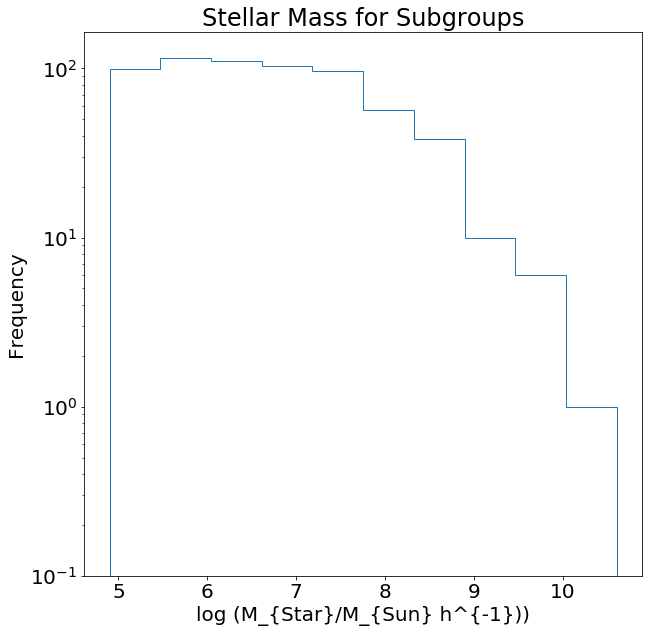

In [23]:
pl.figure(figsize=(10,10))

i = np.where(SGstMass>0)

lSGstMass = np.log10(SGstMass[i]*1e10)

pl.title('Stellar Mass for Subgroups')

pl.hist(lSGstMass, log=True, histtype='step')
pl.xlabel('log (M_{Star}/M_{Sun} h^{-1}))')
pl.ylabel('Frequency')

Text(0, 0.5, 'log (M_{Star}/M_{Sun} h^{-1}))')

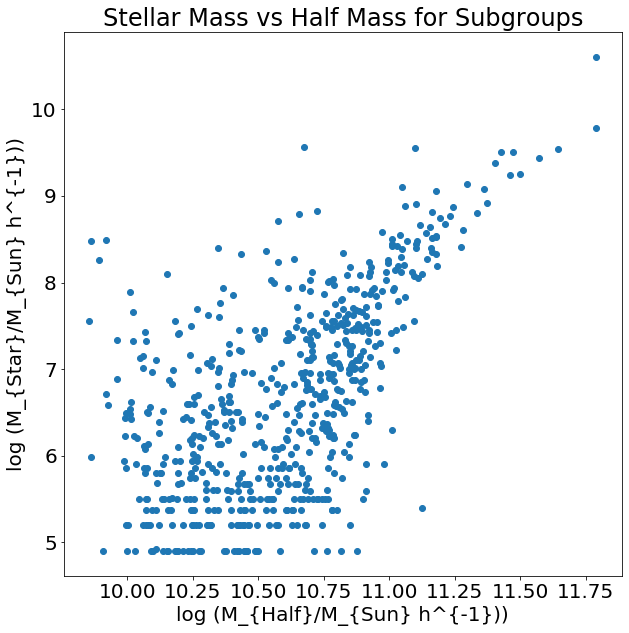

In [24]:
pl.figure(figsize=(10,10))

pl.title('Stellar Mass vs Half Mass for Subgroups')

i = np.where(SGstMass>0)

lSGMassS = np.log10(SGMassC[i]*1e10)

pl.plot(lSGMassS, lSGstMass, marker='o', ls=' ')
pl.xlabel('log (M_{Half}/M_{Sun} h^{-1}))')
pl.ylabel('log (M_{Star}/M_{Sun} h^{-1}))')

In [25]:
# and now lets take a look at the efficiency.
# but i dont remeber the sfr stuff.

pt0 = snap['PartType0']
pt0.keys()

<KeysViewHDF5 ['Abundances', 'BindingEnergy', 'Circularity', 'Coordinates', 'Density', 'ElectronAbundance', 'Esn', 'EsnCold', 'GroupNumber', 'InternalEnergy', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'SmoothingLength', 'SpecificAngularMomentum', 'StarFormationRate', 'SubFindNumber', 'SubGroupNumber', 'Velocities']>

In [26]:
sfrs = pt0['StarFormationRate']
sfrs.attrs.keys()

<KeysViewHDF5 ['cgs_conversion_factor', 'cgs_units', 'description', 'description_units']>

In [27]:
sfrs.attrs['description_units']

'$M_\\odot yr^{-1}$'

In [28]:
SG_sfr = []

offPt0 = subgrou['PartType0/Offsets'][()].astype('int')

for off in offPt0:
    Tsfr = pt0['StarFormationRate'][off[0]:off[1]]
    SG_sfr.append(np.sum(Tsfr))

SG_sfr = np.array(SG_sfr)

Text(0, 0.5, 'Frequency')

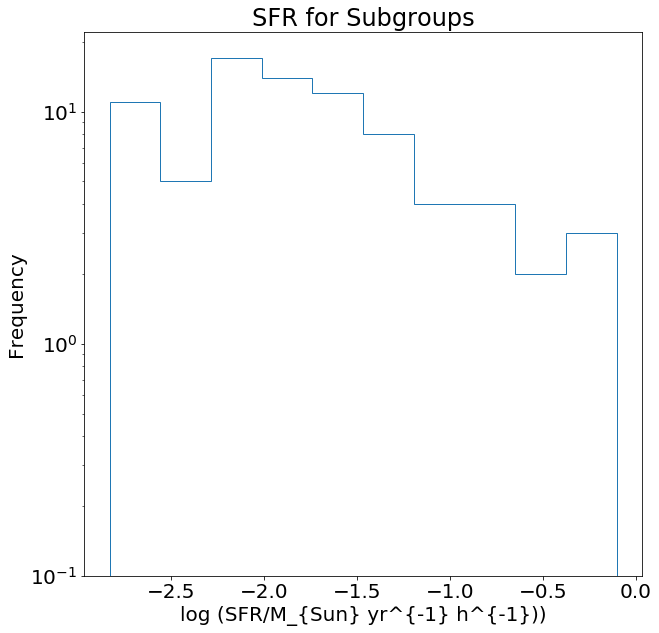

In [29]:
pl.figure(figsize=(10,10))

i = np.where(SG_sfr>0)

lSG_sfr = np.log10(SG_sfr[i])

pl.title('SFR for Subgroups')

pl.hist(lSG_sfr, log=True, histtype='step')
pl.xlabel('log (SFR/M_{Sun} yr^{-1} h^{-1}))')
pl.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

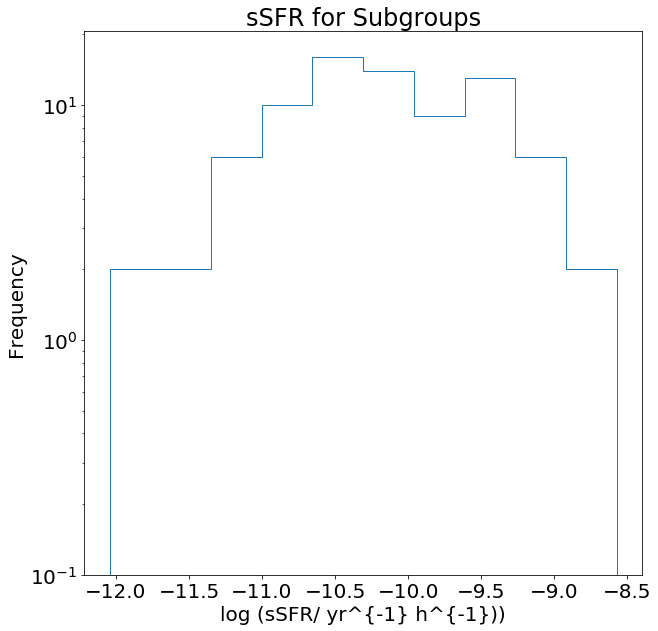

In [30]:
#and sSFR

pl.figure(figsize=(10,10))

i = np.where(SG_sfr>0)

lSG_ssfr = np.log10(SG_sfr[i]/(SGstMass[i]*1e10))

pl.title('sSFR for Subgroups')

pl.hist(lSG_ssfr, log=True, histtype='step')
pl.xlabel('log (sSFR/ yr^{-1} h^{-1}))')
pl.ylabel('Frequency')

In [31]:
# we need the as mass
pt0Mass = pt0['Masses']
pt0Mass.attrs['description_units']

'$10^{10}  h^{-1} M_\\odot$'

In [32]:
SGGasMass = []

#offPt0 = subgrou['PartType0/Offsets'][()].astype('int')

for off in offPt0:
    TGasMass = pt0Mass[off[0]:off[1]]
    SGGasMass.append(np.sum(TGasMass))

SGGasMass = np.array(SGGasMass)

Text(0, 0.5, 'Frequency')

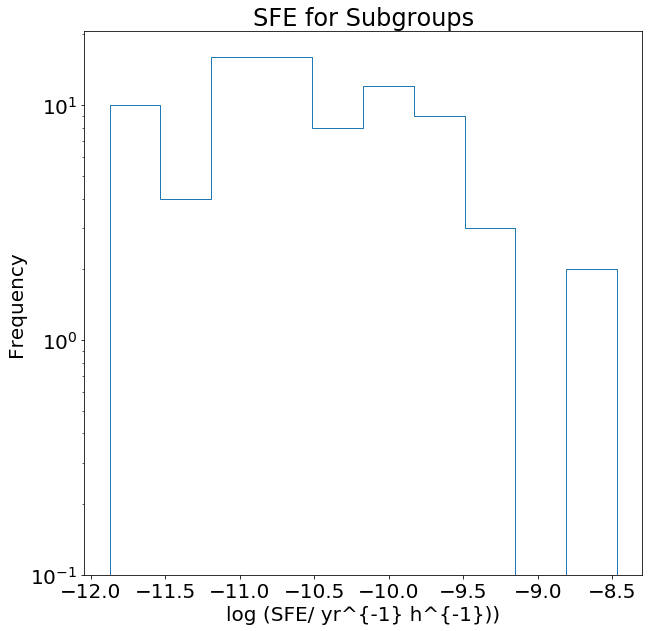

In [33]:
#and sSFR

pl.figure(figsize=(10,10))

i = np.where(SG_sfr>0)

lSG_sfe = np.log10(SG_sfr[i]/(SGGasMass[i]*1e10))

pl.title('SFE for Subgroups')

pl.hist(lSG_sfe, log=True, histtype='step')
pl.xlabel('log (SFE/ yr^{-1} h^{-1}))')
pl.ylabel('Frequency')

<ipython-input-34-c18b10d75c0f>:4: RuntimeWarning: divide by zero encountered in log10
  pl.plot(np.log10(SGstMass), np.log10(SGGasMass), ls=' ', marker='o')


Text(0, 0.5, 'gas mass')

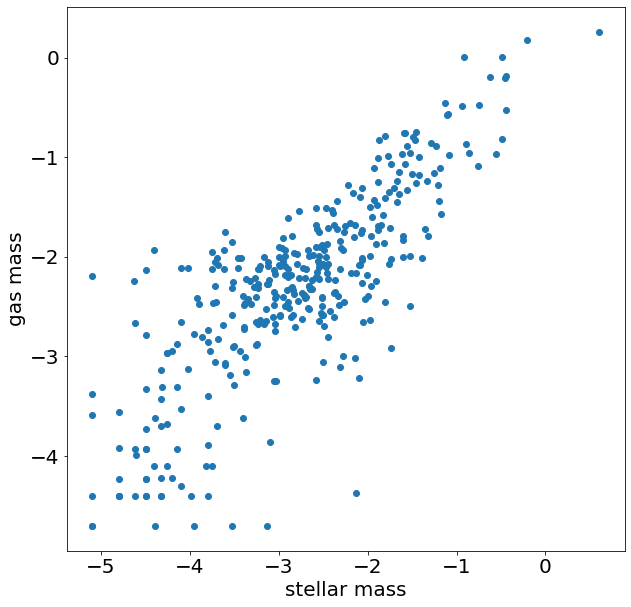

In [34]:
# it looks VERY similar to the sSFR, it is weird, and no, i'm imbecil
pl.figure(figsize=(10,10))

pl.plot(np.log10(SGstMass), np.log10(SGGasMass), ls=' ', marker='o')
pl.xlabel('stellar mass')
pl.ylabel('gas mass')

In [35]:
!head Snap

head: cannot open 'Snap' for reading: No such file or directory
